## Triangulation code - Using polygon center of mass

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Circle, Polygon
from itertools import combinations, product
import os

# xyz coordinates of reference points
reference_points = np.array([
    [475287.725, 539899.896], # 1
    [475288.527, 539899.682], # 2
    [475288.898, 539899.235], # 3
    [475290.192, 539899.113], # 4 
    [475292.210, 539900.157], # 5
    [475291.970, 539901.968], # 6
    [475292.783, 539901.734], # 7
    [475292.993, 539901.185], # 8
    [475292.000, 539903.000], # 9 # never used
    [475292.771, 539903.950], # 10
    [475293.945, 539903.572], # 11
    [475294.397, 539903.999], # 12
    [475294.997, 539903.589], # 13
    [475229.425, 539952.654], # 14
    [475231.508, 539951.970], # 15
    [475231.721, 539954.740], # 16
    [475233.636, 539954.306], # 17
    [475235.383, 539956.440], # 18
    [475235.780, 539957.610], # 19
    [475234.816, 539959.693], # 20
    [475236.501, 539958.827], # 21
    [475236.686, 539960.687], # 22
    [475235.559, 539962.693], # 23
    [475238.078, 539964.461], # 24
    [475238.000, 539965.000], # 25 # never used
    [475239.084, 539966.237], # 26
    [475239.649, 539967.106], # 27
    [475237.945, 539968.781], # 28
    [475240.373, 539968.088], # 29
    [475238.303, 539970.257], # 30
    [475239.538, 539970.683], # 31
    ]) 

#### Function Definitions

In [73]:
# Defining a function to know if two circles intersect
def do_they_intersect(x1, y1, r1, x2, y2, r2):
    # Distance between both centers
    distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    tempBool1 = True
    # Do they intersect?
    if distance > (r1 + r2) or distance < abs(r1 - r2):
        tempBool1 = False
    return tempBool1

# Getting circle intersections
def get_circle_intersection(x1, y1, r1, x2, y2, r2):
    # Distance between both centers
    distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    a = (r1**2 - r2**2 + distance**2) / (2 * distance)
    h = np.sqrt(r1**2 - a**2)
    x3 = x1 + a * (x2 - x1) / distance
    y3 = y1 + a * (y2 - y1) / distance

    p1_x = x3 + h * (y2 - y1) / distance
    p1_y = y3 - h * (x2 - x1) / distance

    p2_x = x3 - h * (y2 - y1) / distance
    p2_y = y3 + h * (x2 - x1) / distance

    tempCalc1 = np.array([[p1_x, p1_y],
                            [p2_x, p2_y]])
    return tempCalc1

def get_circle_closest(x1, y1, r1, x2, y2, r2):
    # Distance between both centers
    distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    
    if distance < abs(r1 - r2):  # One circle is inside the other
        if r1 > r2:
            x1, y1, r1, x2, y2, r2 = x2, y2, r2, x1, y1, r1  # Ensure r1 is the smaller circle
        
        # Point on the circumference of the smaller circle
        x_inner = x1 - r1 * (x2 - x1) / distance
        x_outer = x2 - r2 * (x2 - x1) / distance
    
        y_inner = y1 - r1 * (y2 - y1) / distance
        y_outer = y2 - r2 * (y2 - y1) / distance
    
        tempCalc1 = np.array([[x_inner, y_inner],
                            [x_outer, y_outer]])
        return tempCalc1
    else:
        a1 = r1 / distance
        a2 = r2 / distance

        p1_x = x1 + a1 * (x2 - x1)
        p1_y = y1 + a1 * (y2 - y1)
        p2_x = x2 - a2 * (x2 - x1)
        p2_y = y2 - a2 * (y2 - y1)

        tempCalc1 = np.array([[p1_x, p1_y],
                            [p2_x, p2_y]])
    return tempCalc1

def get_polygon(rep_points12, rep_points13, rep_points23, intersect_bool12, intersect_bool13, intersect_bool23):
    # Calculating distances between representative points
    p1a_to_p2a = np.sqrt((rep_points12[0,0] - rep_points13[0,0])**2 + (rep_points12[0,1] - rep_points13[0,1])**2)
    p1a_to_p2b = np.sqrt((rep_points12[0,0] - rep_points13[1,0])**2 + (rep_points12[0,1] - rep_points13[1,1])**2)
    p1b_to_p2a = np.sqrt((rep_points12[1,0] - rep_points13[0,0])**2 + (rep_points12[1,1] - rep_points13[0,1])**2)
    p1b_to_p2b = np.sqrt((rep_points12[1,0] - rep_points13[1,0])**2 + (rep_points12[1,1] - rep_points13[1,1])**2)

    p1a_to_p3a = np.sqrt((rep_points12[0,0] - rep_points23[0,0])**2 + (rep_points12[0,1] - rep_points23[0,1])**2)
    p1a_to_p3b = np.sqrt((rep_points12[0,0] - rep_points23[1,0])**2 + (rep_points12[0,1] - rep_points23[1,1])**2)
    p1b_to_p3a = np.sqrt((rep_points12[1,0] - rep_points23[0,0])**2 + (rep_points12[1,1] - rep_points23[0,1])**2)
    p1b_to_p3b = np.sqrt((rep_points12[1,0] - rep_points23[1,0])**2 + (rep_points12[1,1] - rep_points23[1,1])**2)

    p2a_to_p3a = np.sqrt((rep_points13[0,0] - rep_points23[0,0])**2 + (rep_points13[0,1] - rep_points23[0,1])**2)
    p2a_to_p3b = np.sqrt((rep_points13[0,0] - rep_points23[1,0])**2 + (rep_points13[0,1] - rep_points23[1,1])**2)
    p2b_to_p3a = np.sqrt((rep_points13[1,0] - rep_points23[0,0])**2 + (rep_points13[1,1] - rep_points23[0,1])**2)
    p2b_to_p3b = np.sqrt((rep_points13[1,0] - rep_points23[1,0])**2 + (rep_points13[1,1] - rep_points23[1,1])**2)
    
    # Deciding which of the two points is closer to the group of points
    polygon = np.zeros((3,2))
    polygon[0] = rep_points12[0]
    polygon[1] = rep_points13[0]
    polygon[2] = rep_points23[0]

    # tempCalc1 = p1a_to_p2a + p1a_to_p2b + p1a_to_p3a + p1a_to_p3b
    # tempCalc2 = p1b_to_p2a + p1b_to_p2b + p1b_to_p3a + p1b_to_p3b
    # tempCalc3 = p1a_to_p2a + p1b_to_p2a + p2a_to_p3a + p2a_to_p3b
    # tempCalc4 = p1a_to_p2b + p1b_to_p2b + p2b_to_p3a + p2b_to_p3b
    # tempCalc5 = p1a_to_p3a + p1b_to_p3a + p2a_to_p3a + p2b_to_p3a
    # tempCalc6 = p1a_to_p3b + p1b_to_p3b + p2a_to_p3b + p2b_to_p3b

    # Function to calculate the Euclidean distance between two points
    def euclidean_distance(p1, p2):
        return np.sqrt(np.sum((p1 - p2) ** 2))

    # Generate all combinations of one point from each pair
    combinations = list(product(rep_points12, rep_points13, rep_points23))

    # Calculate the total distance for each combination
    def total_distance(points):
        p1, p2, p3 = points
        return (euclidean_distance(p1, p2) +
                euclidean_distance(p2, p3) +
                euclidean_distance(p3, p1))

    # Find the combination with the smallest total distance
    distances = [total_distance(combo) for combo in combinations]
    min_index = np.argmin(distances)

    # Retrieve the best combination and its total distance
    tempCalc1 = combinations[min_index]
    polygon = np.zeros((3,2))
    polygon[0] = tempCalc1[0]
    polygon[1] = tempCalc1[1]
    polygon[2] = tempCalc1[2]

    # Choosing the point that is closer to the group
    # if tempCalc1 > tempCalc2:
    #     polygon[0] = rep_points12[1]
    # if tempCalc3 > tempCalc4:
    #     polygon[1] = rep_points13[1]
    # if tempCalc5 > tempCalc6:
    #     polygon[2] = rep_points23[1]

    # If circles do not intersect, choose the middle point between both rep points
    if intersect_bool12 == False:
        polygon[0] = np.mean(rep_points12, axis=0)
    if intersect_bool13 == False:
        polygon[1] = np.mean(rep_points13, axis=0)
    if intersect_bool23 == False:
        polygon[2] = np.mean(rep_points23, axis=0)
    
    return polygon

def get_rock_coordinates(ref_points, ref_to_rock):
    # Checking if circles intersect
    intersect_bool12 = do_they_intersect(ref_points[0,0], ref_points[0,1], ref_to_rock[0], 
                                        ref_points[1,0], ref_points[1,1], ref_to_rock[1])
    intersect_bool13 = do_they_intersect(ref_points[0,0], ref_points[0,1], ref_to_rock[0],
                                        ref_points[2,0], ref_points[2,1], ref_to_rock[2])
    intersect_bool23 = do_they_intersect(ref_points[1,0], ref_points[1,1], ref_to_rock[1],
                                        ref_points[2,0], ref_points[2,1], ref_to_rock[2])
    
    # Getting the representative points for each pair of circles
    if intersect_bool12 == True:
        rep_points12 = get_circle_intersection(ref_points[0,0], ref_points[0,1], ref_to_rock[0],
                                            ref_points[1,0], ref_points[1,1], ref_to_rock[1])
    else:
        rep_points12 = get_circle_closest(ref_points[0,0], ref_points[0,1], ref_to_rock[0],
                                        ref_points[1,0], ref_points[1,1], ref_to_rock[1])
    if intersect_bool13 == True:
        rep_points13 = get_circle_intersection(ref_points[0,0], ref_points[0,1], ref_to_rock[0],
                                            ref_points[2,0], ref_points[2,1], ref_to_rock[2])
    else:
        rep_points13 = get_circle_closest(ref_points[0,0], ref_points[0,1], ref_to_rock[0],
                                        ref_points[2,0], ref_points[2,1], ref_to_rock[2])
    if intersect_bool23 == True:
        rep_points23 = get_circle_intersection(ref_points[1,0], ref_points[1,1], ref_to_rock[1],
                                            ref_points[2,0], ref_points[2,1], ref_to_rock[2])
    else:
        rep_points23 = get_circle_closest(ref_points[1,0], ref_points[1,1], ref_to_rock[1],
                                        ref_points[2,0], ref_points[2,1], ref_to_rock[2])
    rep_points = [rep_points12, rep_points13, rep_points23]

    # Getting the polygon defined by the most representative points
    polygon = get_polygon(rep_points12, rep_points13, rep_points23, intersect_bool12, intersect_bool13, intersect_bool23)
    CM = np.mean(polygon, axis=0)

    # Getting the confidence radius for the measurements
    tempCalc1 = np.sqrt((polygon[0][0] - CM[0])**2 + (polygon[0][1] - CM[1])**2)
    tempCalc2 = np.sqrt((polygon[1][0] - CM[0])**2 + (polygon[1][1] - CM[1])**2)
    tempCalc3 = np.sqrt((polygon[2][0] - CM[0])**2 + (polygon[2][1] - CM[1])**2)
    confidence_radius = np.max((tempCalc1, tempCalc2, tempCalc3))

    return CM, rep_points, confidence_radius, polygon

# Function to plot circles
def plot_circle(ax, x, y, r, label):
    circle = plt.Circle((x, y), r, fill=False, label=label)
    ax.add_patch(circle)
    ax.plot(x, y, 'yo')  # Plot center
    ax.annotate(label, (x, y), textcoords="offset points", xytext=(10,10), ha='center')

def plot3circles(centers, radii, labels, rep_points=None, polygon=None, CM=None, confidence=None, particle_id=None, survey_name=None):
    fig, ax = plt.subplots(figsize=(8, 8))
    fig.patch.set_facecolor('white')
    ax.set_aspect('equal', 'box')
    for (x, y), r, label in zip(centers, radii, labels):
        plot_circle(ax, x, y, r, label)
    cols = ["red", "green", "blue"]
    if isinstance(rep_points, list):
        for i in range(3):
            ax.scatter(rep_points[i][:,0], rep_points[i][:,1], color=cols[i])
    if isinstance(polygon, np.ndarray):
        polygon_fig = Polygon(polygon, closed=True, edgecolor="purple", fill=None)
        ax.add_patch(polygon_fig)
    if isinstance(CM, np.ndarray):
        ax.scatter(CM[0], CM[1], color="gold", marker="x")
    if confidence != None:
        filled_circle = Circle((CM[0], CM[1]), confidence, edgecolor="gold", linestyle='--', 
                        facecolor="none", alpha=0.5, linewidth=2)
        ax.add_patch(filled_circle)
    #plt.legend()
    plt.grid(True)
    plt.title(f"Particle ID: {particle_id} - Coordinates: {CM}")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    # create the directory if it doesn't exist
    directory = f"triangulated_surveys_code/plots/{survey_name}"
    if not os.path.exists(directory):
        os.makedirs(directory)
    # Save the figure
    plt.savefig(f"{directory}/Particle_{particle_id}.png", dpi=300)
    plt.show()
    plt.close()

#### Computing the particle coordinates

In [74]:
os.getcwd()

'c:\\Users\\huck4481\\Documents\\GitHub\\RFID_tracers'

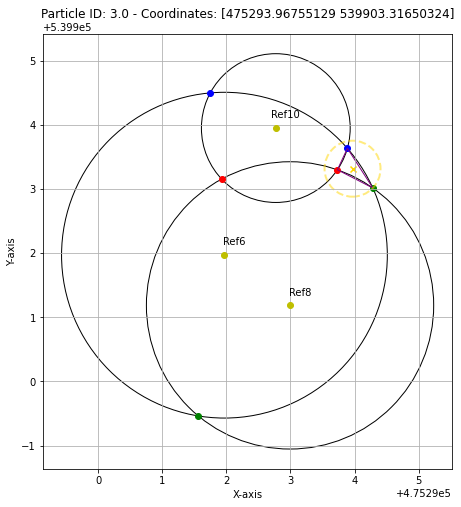

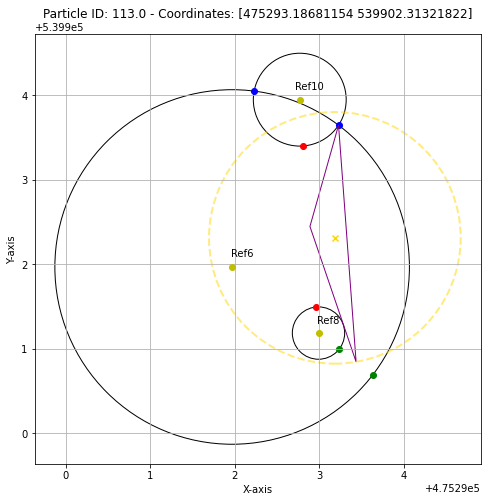

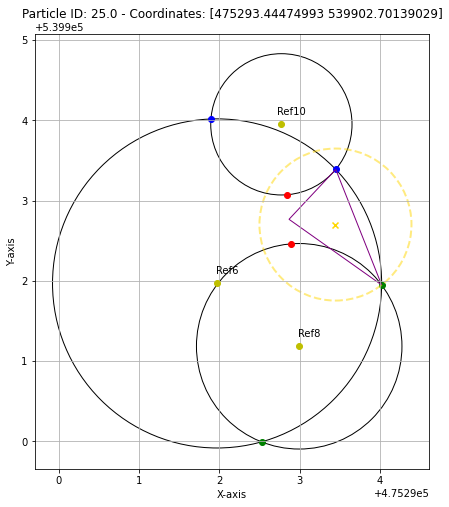

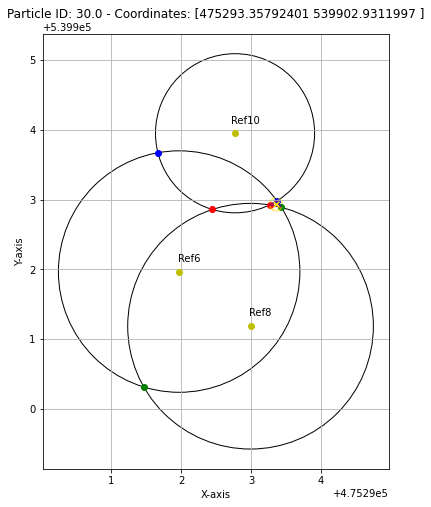

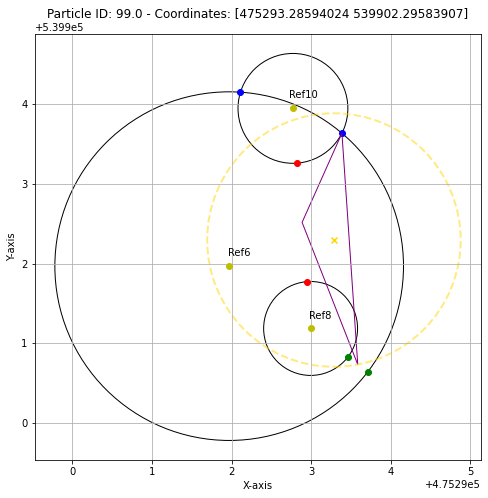

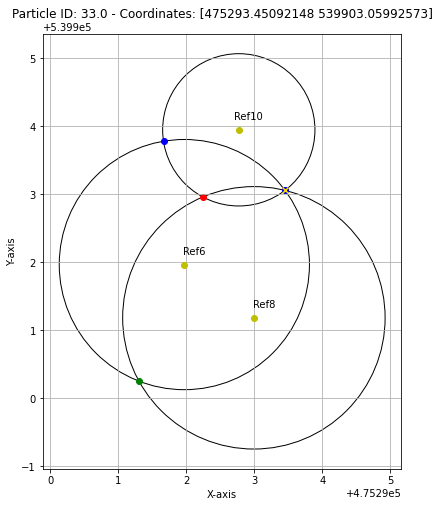

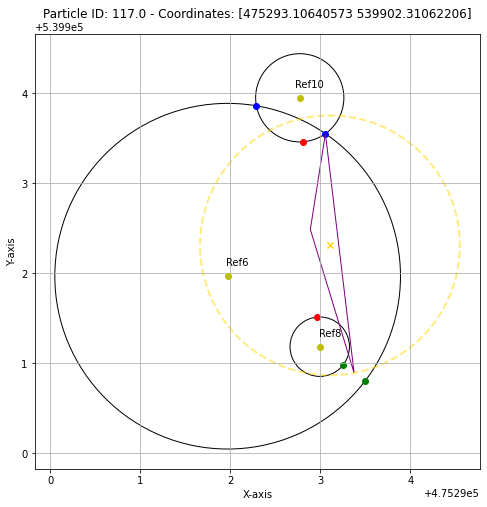

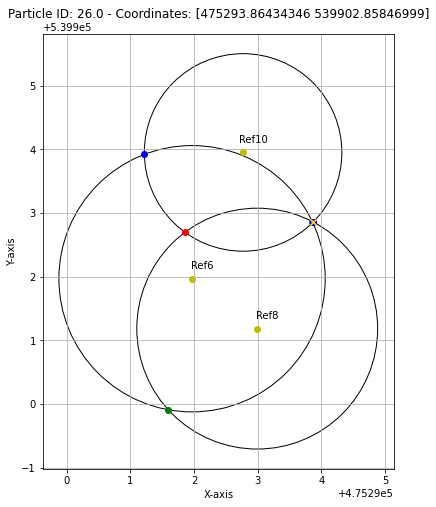

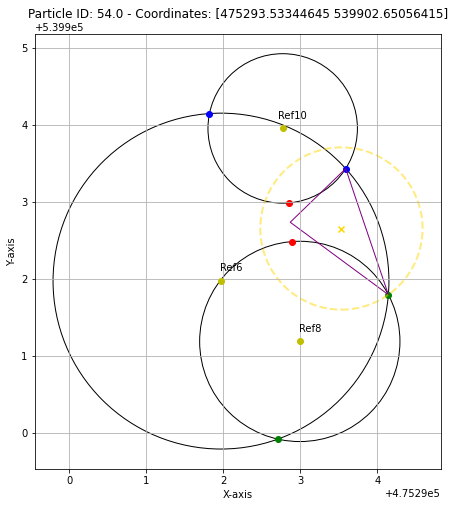

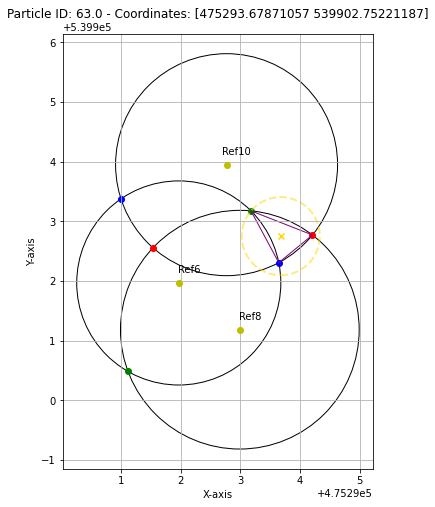

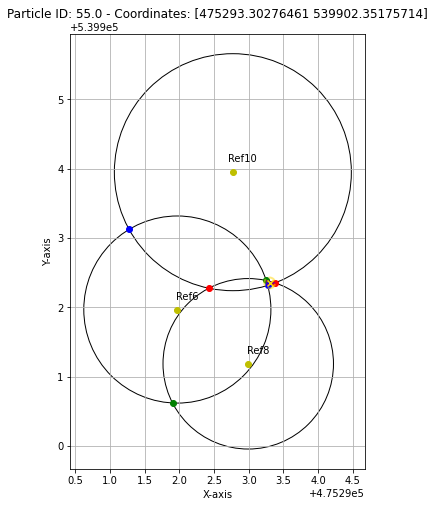

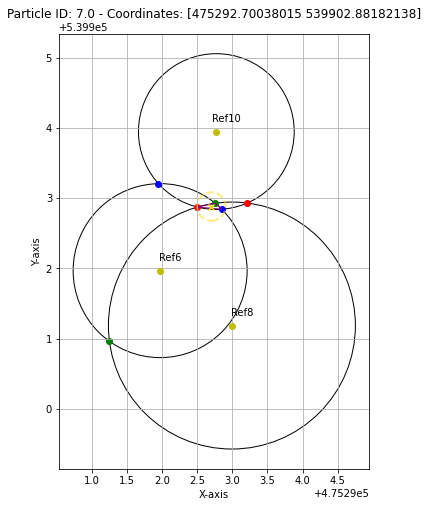

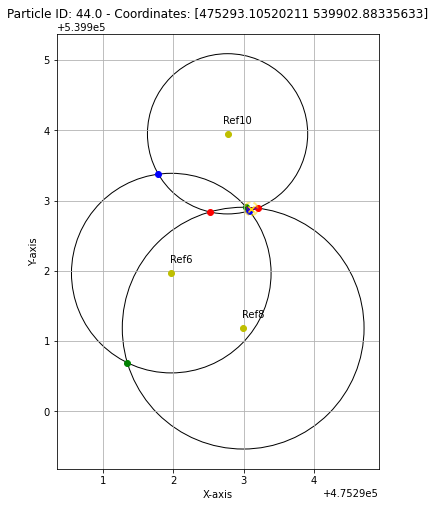

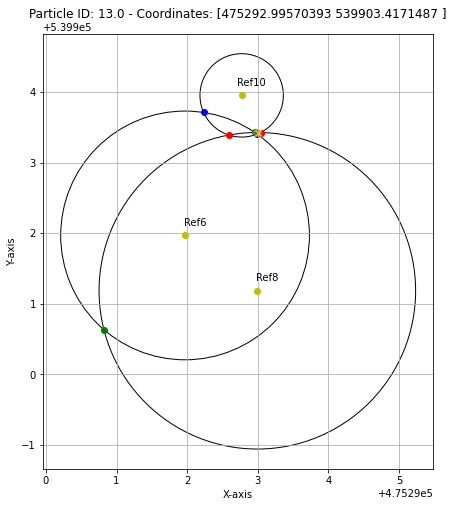

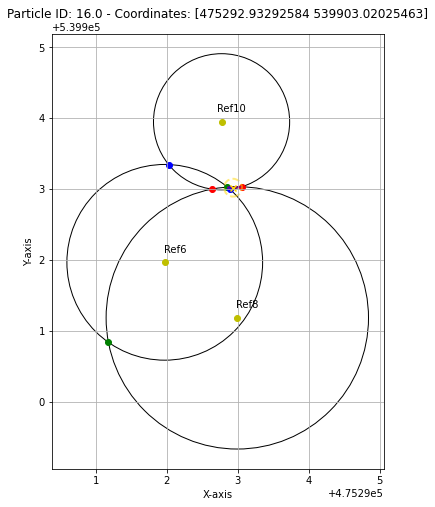

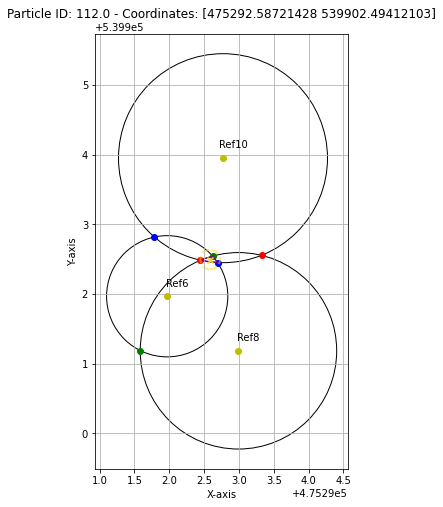

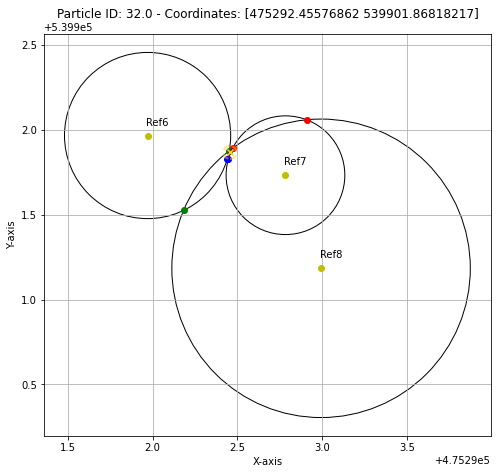

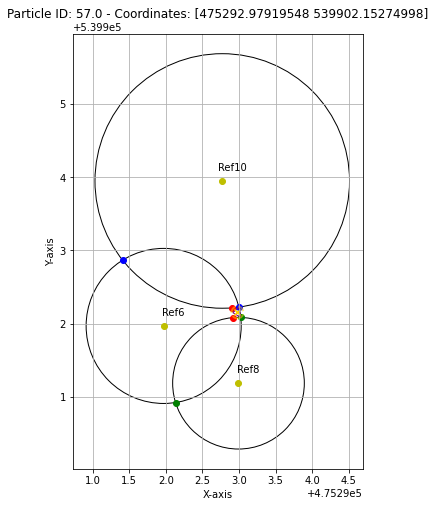

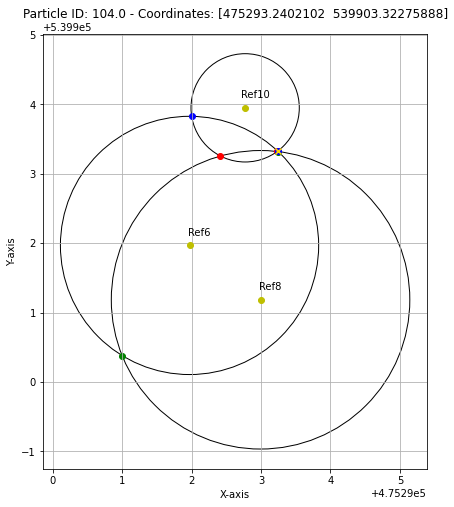

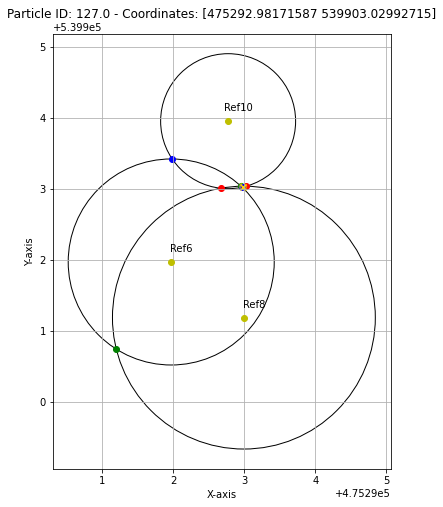

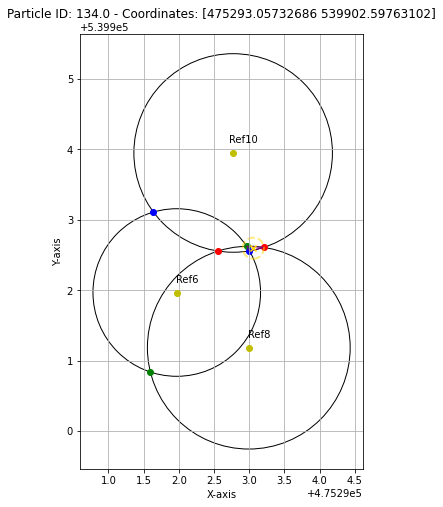

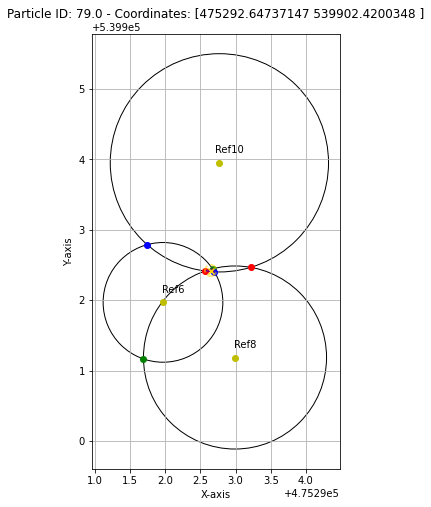

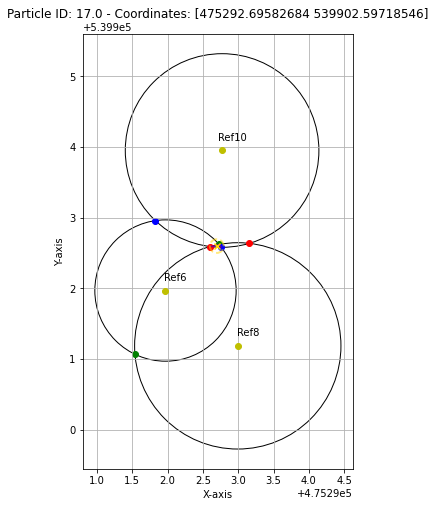

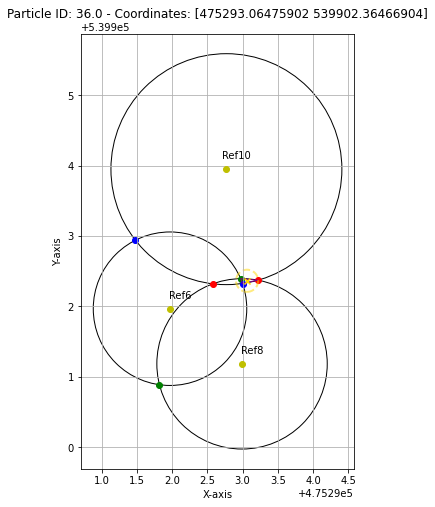

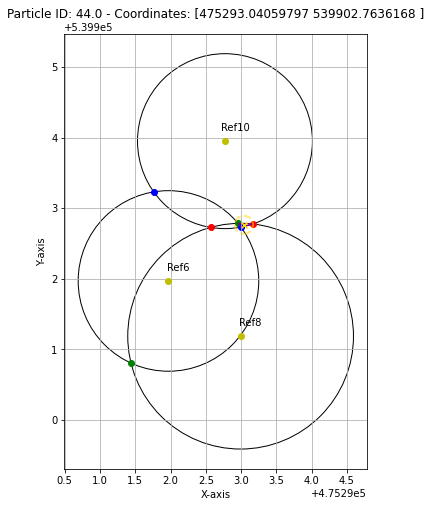

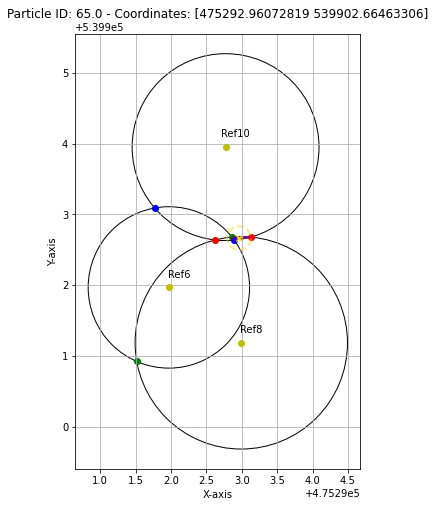

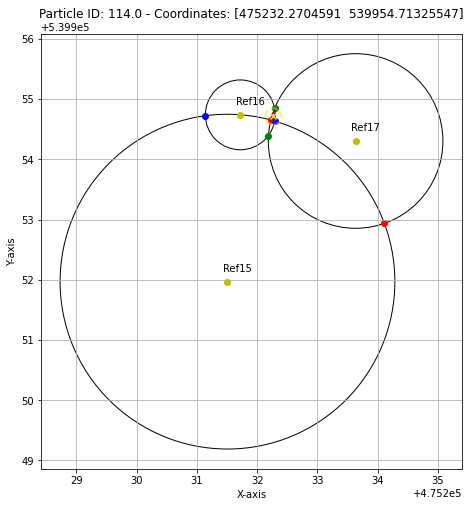

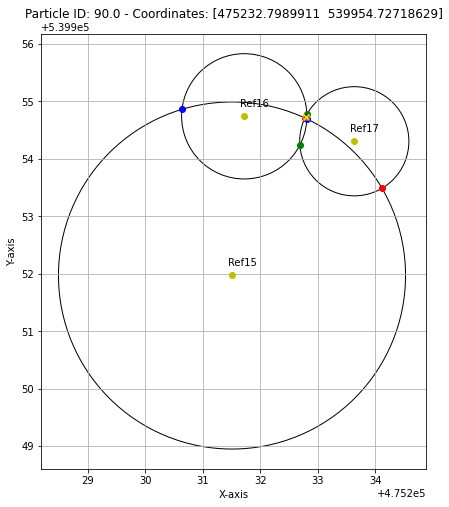

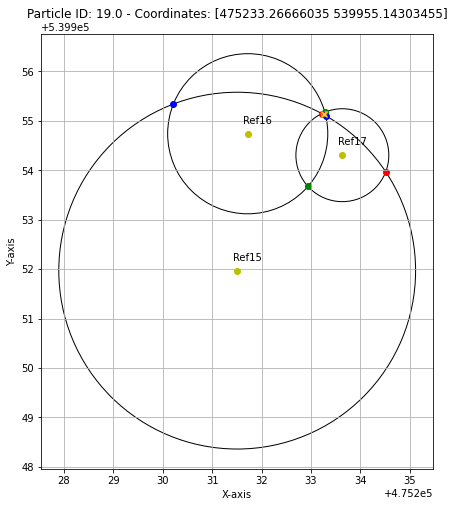

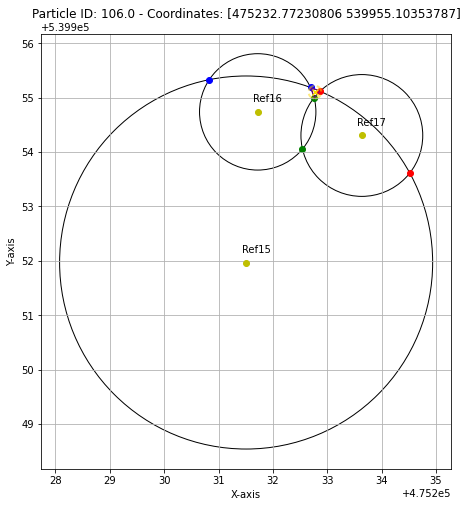

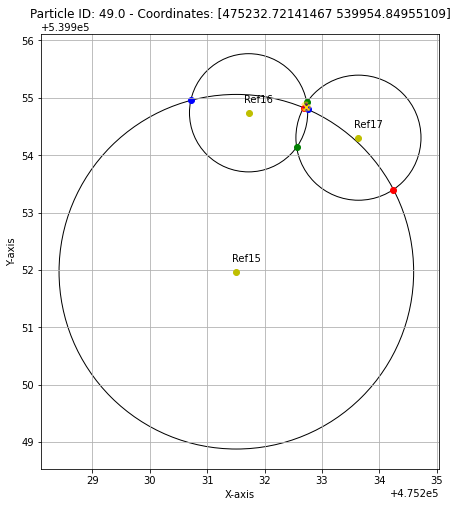

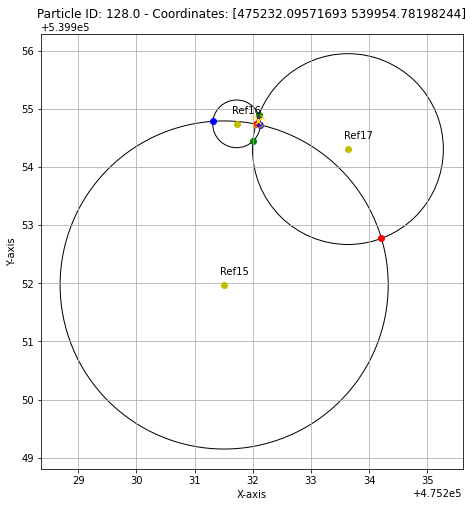

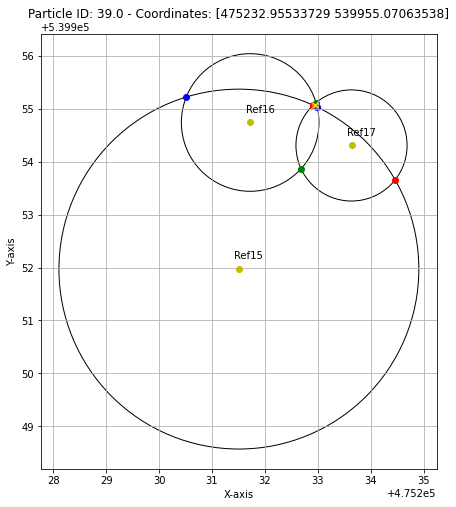

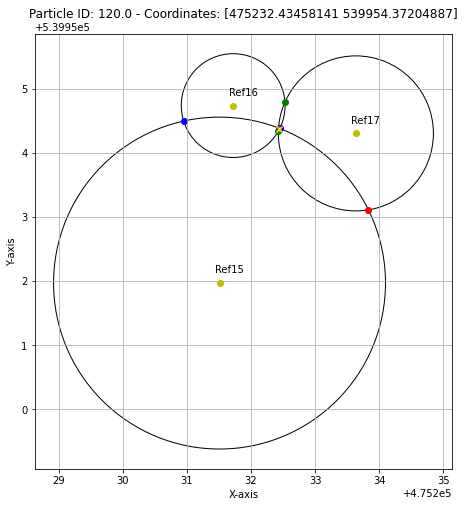

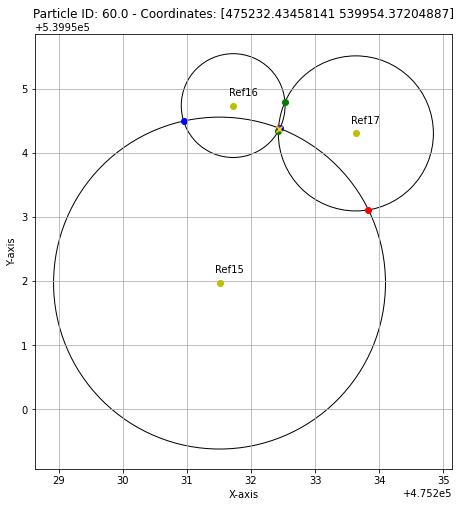

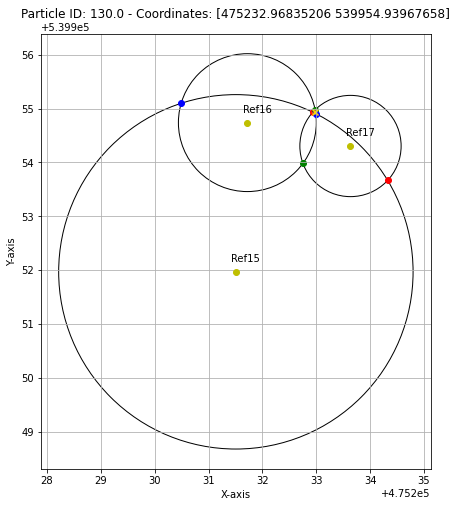

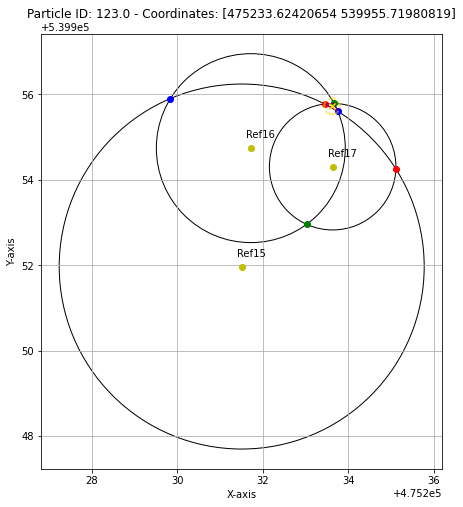

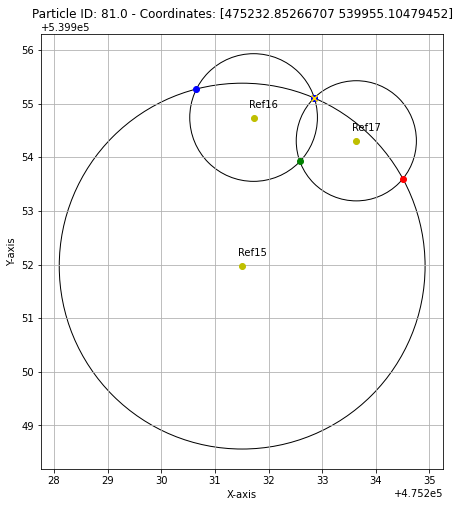

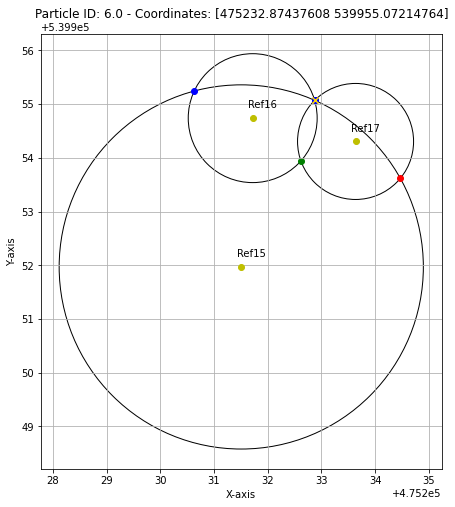

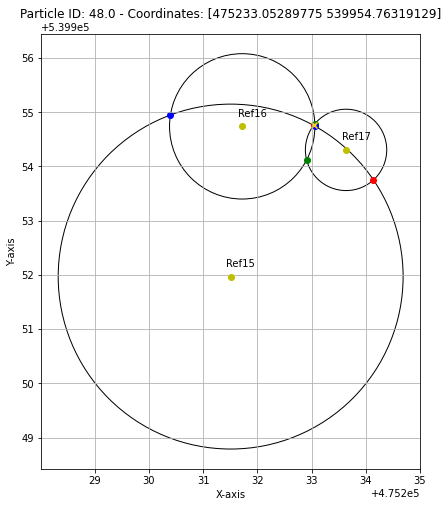

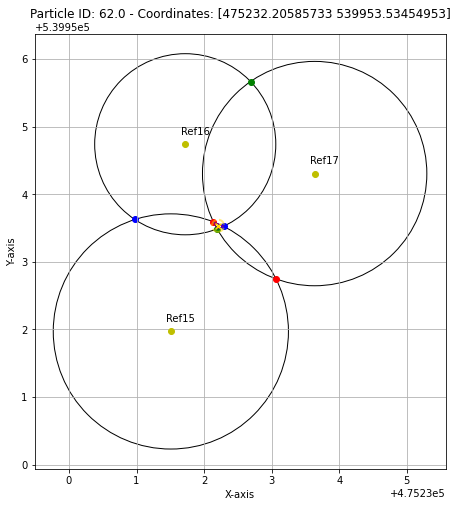

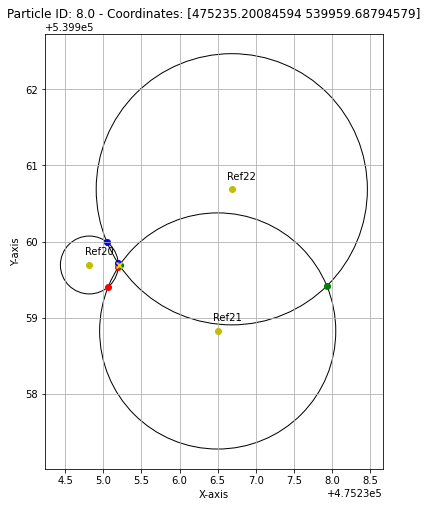

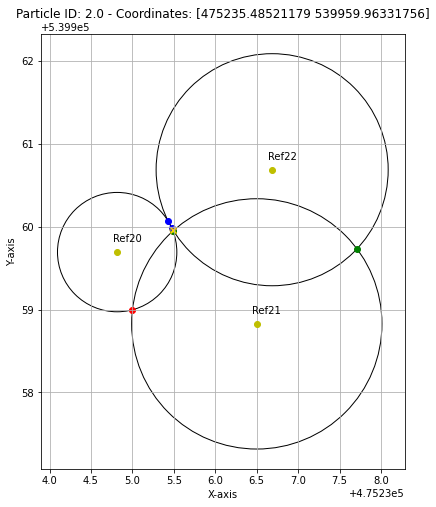

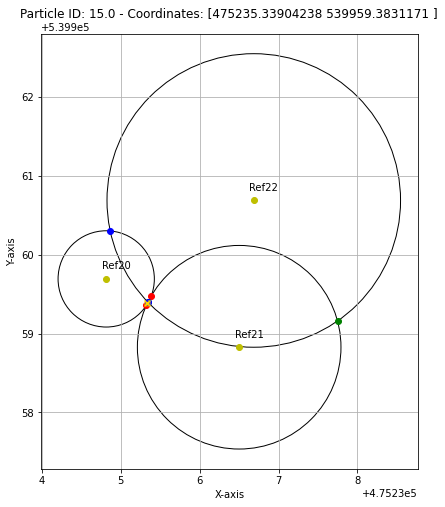

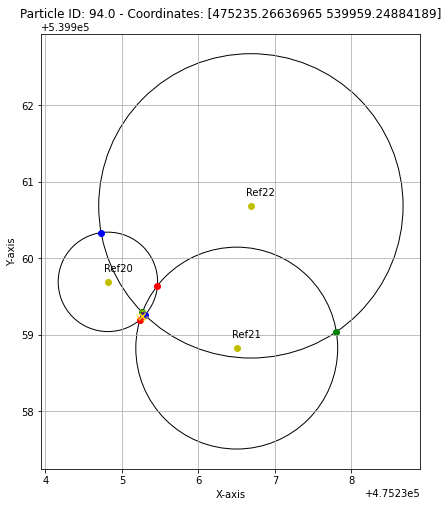

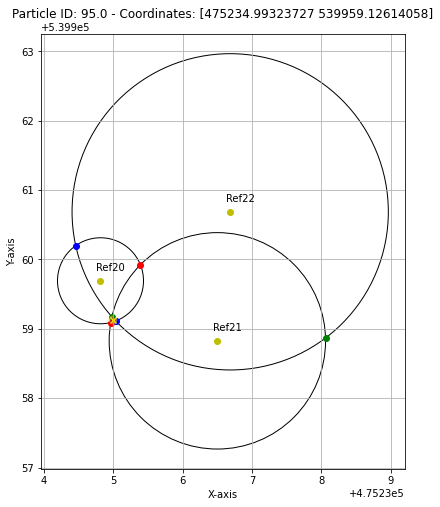

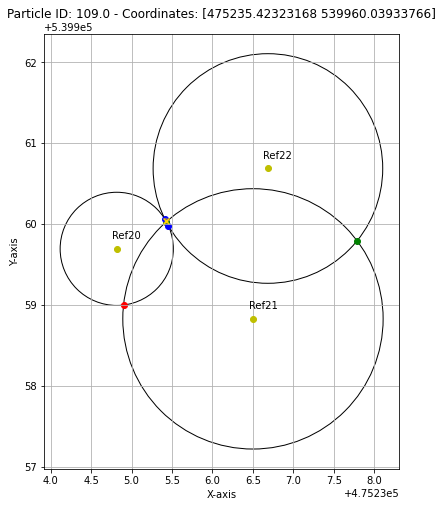

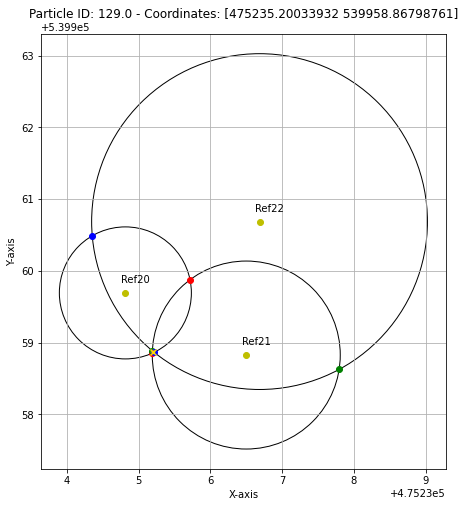

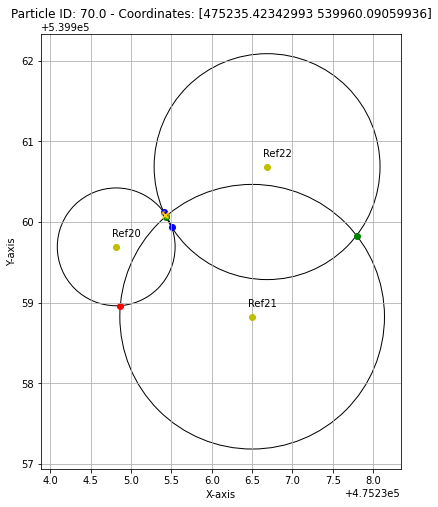

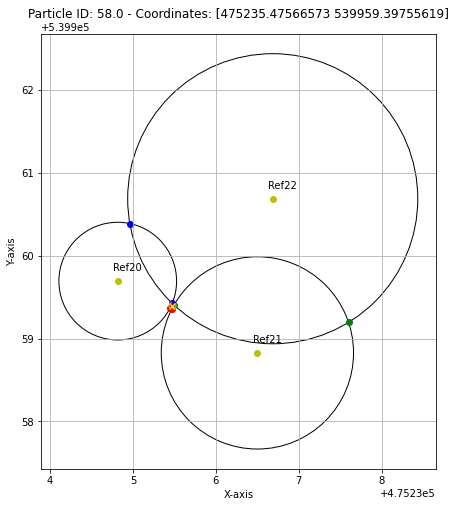

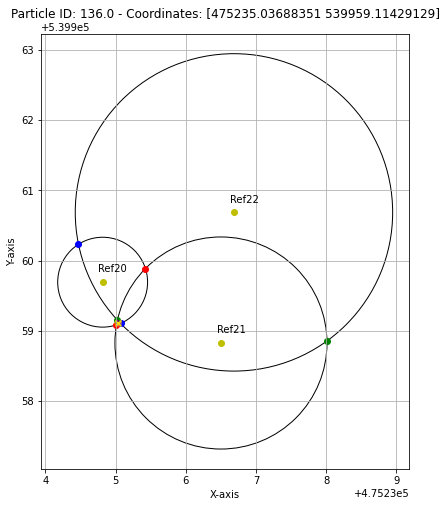

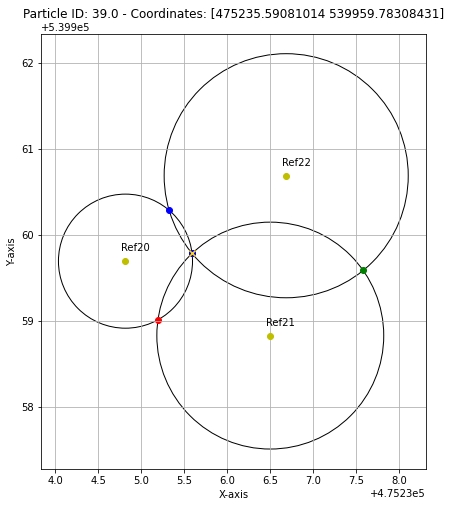

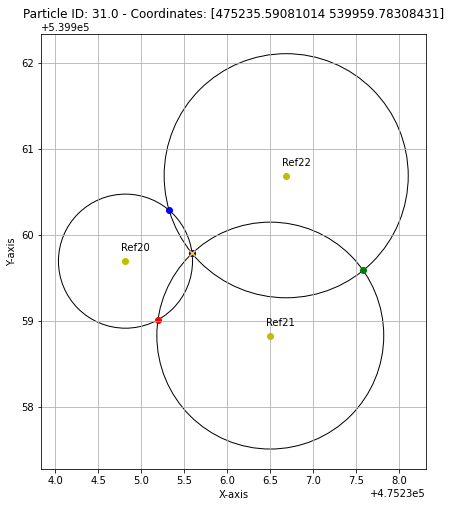

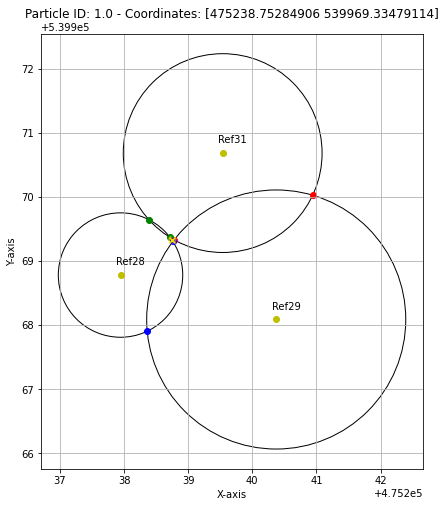

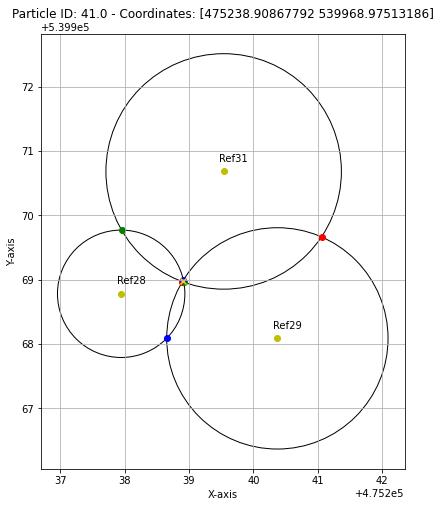

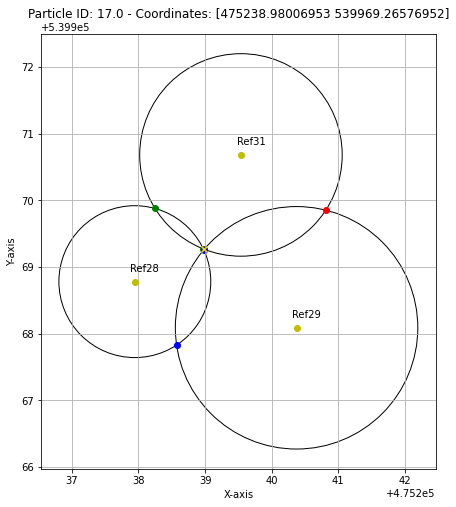

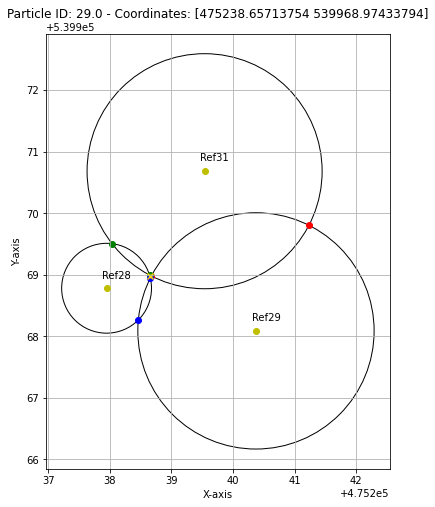

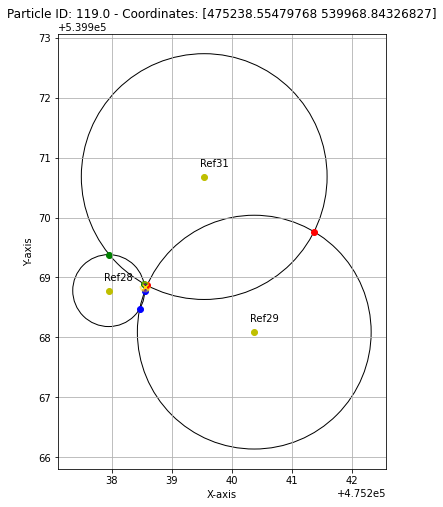

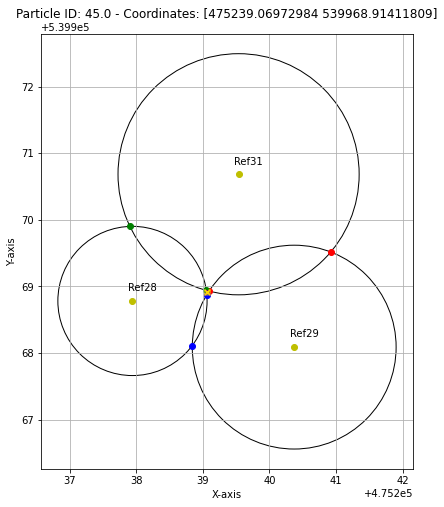

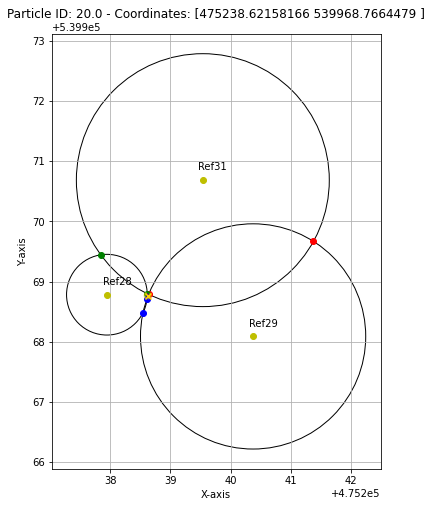

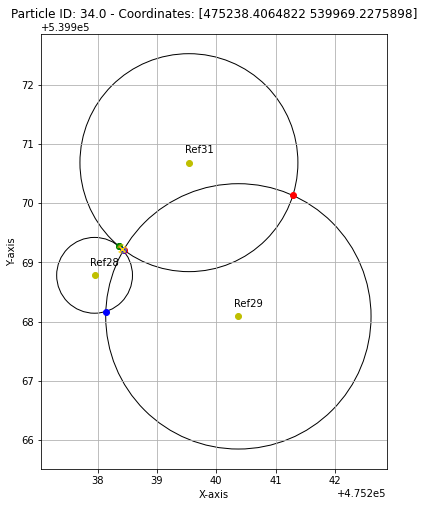

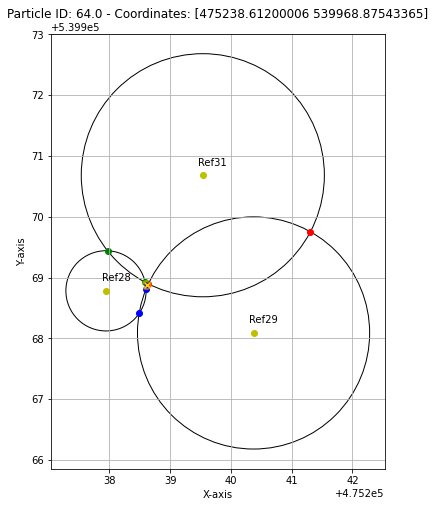

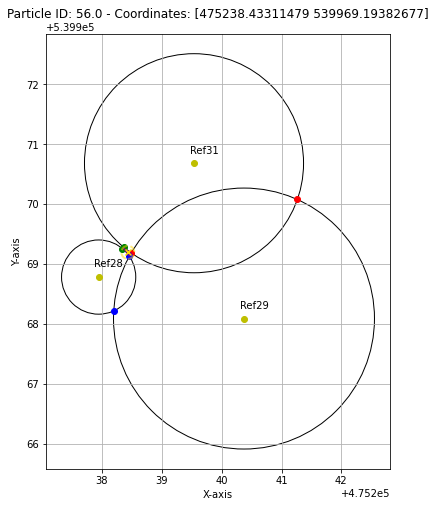

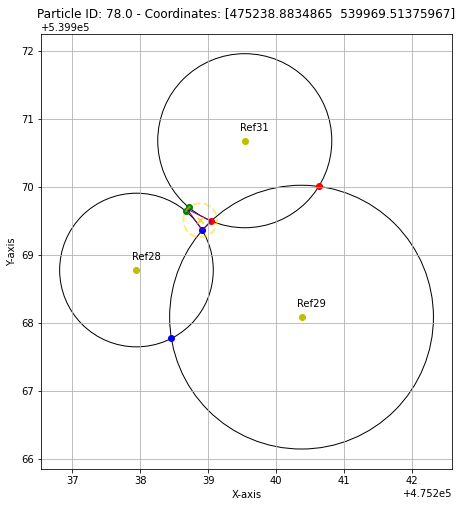

In [80]:
# load the survey data from a CSV file
survey_name = 'tracer_survey_08_06_2022' #### THIS ONE NEEDS TO CHANGE
working_directory = os.getcwd()
tempCalc1 = working_directory + "\\surveys_for_code\\" + survey_name + ".csv"
dataset_dtype = {'ParticleID': np.int32, 'Ref1': np.int32, 'Ref2': np.int32, 'Ref3': np.int32, 'Dist1': np.float64, 'Dist2': np.float64, 'Dist3': np.float64}
survey  = pd.read_csv(tempCalc1, na_values=['-'], dtype=dataset_dtype)
survey = survey.dropna(subset=['ParticleID', 'Ref1', 'Ref2', 'Ref3', 'Dist1', 'Dist2', 'Dist3']) # remove nan values
survey["Dist1"] = survey["Dist1"]/100
survey["Dist2"] = survey["Dist2"]/100
survey["Dist3"] = survey["Dist3"]/100
results = []

for idx, row in survey.iterrows():
    particle_id = row['ParticleID'] # extract the particle ID for the current row
    ref_idx_a, ref_idx_b, ref_idx_c = int(row['Ref1']), int(row['Ref2']), int(row['Ref3'])
    labels = [f"Ref{ref_idx_a}", f"Ref{ref_idx_b}", f"Ref{ref_idx_c}"]
    r1, r2, r3 = row['Dist1'], row['Dist2'], row['Dist3'] # distances from the particle to each of the reference points
    
    # get (x, y) coordinates of each reference point
    p1 = reference_points[ref_idx_a - 1]
    p2 = reference_points[ref_idx_b - 1]
    p3 = reference_points[ref_idx_c - 1]
    # prepare the inputs for get_rock_coordinates
    ref_points = np.array([p1, p2, p3])
    ref_to_rock = np.array([r1, r2, r3])
    # call get_rock_coordinates to get the rock position
    CM, rep_points, confidence_radius, polygon = get_rock_coordinates(ref_points, ref_to_rock)
    # append the results
    results.append((particle_id, CM[0], CM[1], confidence_radius))
    # plot the circles
    plot3circles(centers=[p1, p2, p3], radii=[r1, r2, r3], labels=labels, rep_points=rep_points, 
                polygon=polygon, CM=CM, confidence=confidence_radius, particle_id=particle_id, survey_name=survey_name)

# convert the results list to a DataFrame
results_df = pd.DataFrame(results, columns=['ParticleID', 'X', 'Y', 'ConfidenceRadius'])
# Save the results to a CSV file - called "triangulated_{survey_name}.csv"
results_df.to_csv(f"triangulated_surveys_code/triangulated_{survey_name}.csv", index=False)